# 速習 napari ―基礎知識と書き方

黄承宇

Cheng-Yu Huang

Department of Physiology, Development and Neuroscience, University of Cambridge

## サマリー
近年、生物画像解析の分野は急速に進歩しており、多次元データに対応した画像可視化ツールの需要が高まっています。Napariは、多次元データに対応した新しく開発された画像可視化ツールで、画像、点群、ボリュームデータ、アノテーション、トラックなどのデータを表示することができます。また、NapariはPython上に構築されたオープンソースソフトウェアであり、使いやすくカスタマイズ可能であり、多くの科学的ライブラリが利用可能なPythonエコシステムの利点を活かしています。このチュートリアルでは、Napariの基本知識と使い方を紹介し、minicondaでのPython環境のセットアップ、及びNapariとインターフェースするために使用されるJupyterノートブックを紹介します。

## はじめの一歩

### Python環境のセットアップ

#### Anaconda/Minicondaのインストール

Pythonパッケージ管理ツール、condaを使用してPython環境を設定します。[このウェブサイト](https://docs.anaconda.com/)でcondaをダウンロードします。condaには二つのバージョン、AnacondaまたはMinicondaがあります。どちらも似たような機能を持っており、どちらともこのチュートリアルと後の章で必要なPython環境を満たします。違いは、Anacondaにはパッケージ管理のためのGUI（グラフィカルユーザーインターフェース）が付属していますが、Minicondaにはないことです。代わりに、Minicondaでは（Anacondaでもできますが）コマンドラインでパッケージを管理します。Anacondaにはプログラミング初心者向けの追加機能が多く含まれており、そのためAnacondaはMinicondaより多いデーターが必要になります（約4.4 GB対約480 MB）。違いの詳細については、[こちら](https://docs.anaconda.com/distro-or-miniconda/)で説明されています。このチュートリアルでは、すべてをコマンドラインで行うため、Minicondaで十分です。

#### Minicondaで仮想環境を作成する

Minicondaがインストールされたら、conda内で仮想環境（venv）を作成します。venvは、異なるプロジェクトで必要なパッケージのインストールを分けて管理するためのツールであり、それぞれのプロジェクトに対して独立したスペースを作成し、それに対してプロジェクトごとの依存関係を含めることができます。venvの利点は、異なるプロジェクトごとに独立した環境を持つことができることです。通常、異なるプロジェクトは異なる目的を持ち、異なるパッケージを使用します。また、Python環境が破損した場合でも、環境を削除することができます。

コマンドラインを使用して環境を作成します。Python環境のインストールの詳しいチュートリアルは[こちら](https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html)で見つけることができます。まず、エクスプローラーで*anaconda prompt*を見つけ, クリックしてください。

エクスプローラーで*anaconda prompt*を見つけ, クリックしてください。

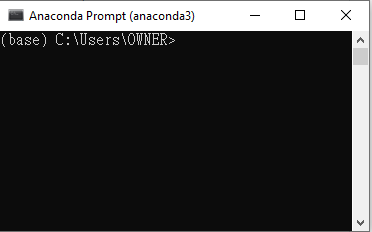

`(Base)` は、ベース、またはデフォルトの環境にいることを意味します。次に、`napari-env` という名前の環境を作成します。環境を作成するには、次のコマンドを実行します：

```bash
conda create -y -n napari-env -c conda-forge python=3.11
```
ここでは、Python 3.11 の環境を作成しています（ユーザーには 3.xx を使用することをお勧めします）。

conda が続行するかどうか尋ねる場合は、`y` を入力してください：
```bash
proceed ([y]/n)?
```
インストールが完了したら、`done` と表示されます（**A**）。
次に、環境を `conda activate` でアクティブにします（**B**）：
```bash
conda activate napari-env
```
コマンドラインの始まりが`(base)`から`(napari-env)`に換わります (**C**)。`napari-env`のvenvに入ったことを意味します。

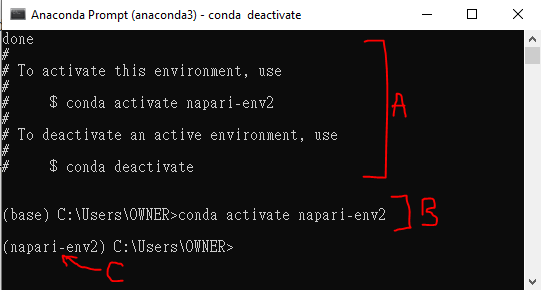

#### napariとJupyterノートブックおよびその他の便利なパッケージのインストール

napari-envに入ったら、napariをインストールします：
```bash
python -m pip install "napari[all]"
```
次に、他の画像解析/画像処理によく使われるパッケージをインストールします。これには、コーディング、ここでは主にnapariとのインターフェースに使用するjupyter、画像処理に役立つ、マトリックス計算を含む数値演算のためのnumpy、作図のためのmatplotlib、科学計算のためのscipy、画像処理に使われるたくさんのアルゴリズムが入っているscikit-image、および表形式データの操作のためのpandasが含まれています。これらのパッケージをインストールするには、次のコマンドを実行してください：
```bash
conda install numpy matplotlib scipy scikit-image jupyter pandas 
```
`proceed ([y]/n)?` と表示されたら、`y` を入力してください。

## Napariを起動する
このセクションでは、Napariの基本的な使い方を紹介します。
### 方法１ - コマンドラインから起動する
Napariを起動する方法はいくつかあります。一つ目の方法は、`napari`と入力してエンターキーを押すことです。`napari`と入力してエンターキーを押してください：
```bash
napari
```
下の図のように、napariウィンドウが開きます。画像を読み込むには、トップバーの`File`メニューをクリックし、`Open File(s)`を選択してください。画像を選択し、`Open`をクリックしてください。画像が表示されます。もう一つの方法として、直接画像をドラッグアンドドロップすることもできます。
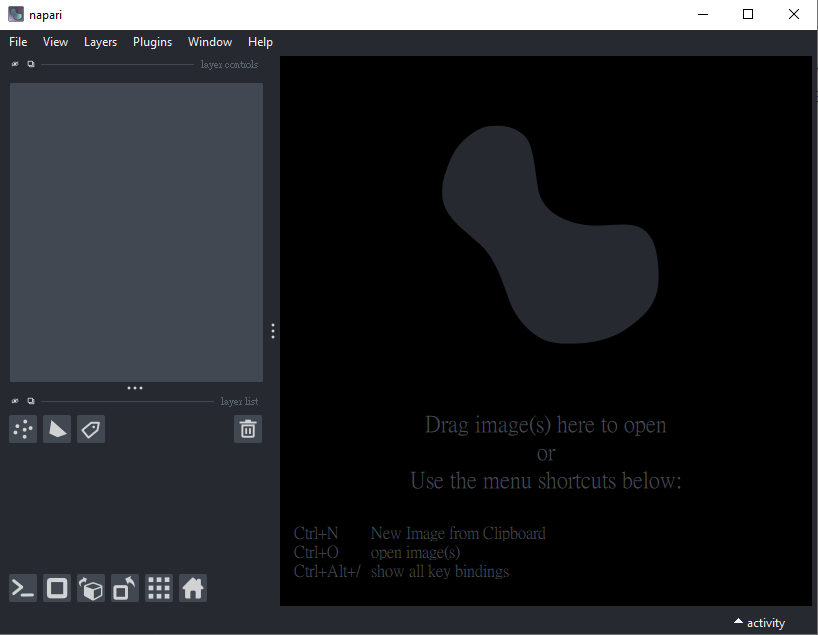

### 方法２ - JupyterノートブックからPythonスクリプトで起動する
NapariはPythonスクリプトからも起動できます。PythonのIDE（統合開発環境）であるJupyterノートブックを使用して、Napariを起動する方法を説明します。Jupyterノートブックは、コードとその結果を同じ場所に表示することができるため、データの可視化に適しています。また、Jupyterでは、コードとドキュメンテーション両方を含むノートブックを作成することができるため、コードの再利用性を高めることができ他の人との共有をする際に便利で、科学文献のコードシェアリングにも適しています。
#### Jupyterノートブックを起動する
Jupyterノートブックを起動するには、次のコマンドを実行してください：
```bash
jupyter notebook
```
##### オプション


 TODO: Download vs code as an alternative to jupyter notebook